# Tourguide Recommendation System Based on Collaborative Filtering
<hr>

#### Source Dataset:
#### Oleh: [[Mikail](https://linkedin.com/in/mikailjordan), [Fander](https://https://linkedin.com/in/m-wahyu-elfander), [Salsa](https://linkedin.com/in/salsabila-azizah-abel)]

# 1. Data Preparation

## Import Library

In [1]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

## Preparing the Dataset used

In [2]:
# Upload semua dataset yang dipakai
from google.colab import files
uploaded = files.upload()

Saving data_tourguide_with_id.csv to data_tourguide_with_id.csv
Saving rating_data.csv to rating_data.csv
Saving user.csv to user.csv


##### Keterangan:
* Tourguide Data


# 2. Data Understanding

## Prepare Data

In [3]:
# Memuat dataset tourguide, user, dan rating untuk tourguide

tourguide = pd.read_csv('data_tourguide_with_id.csv')
user = pd.read_csv('user.csv')
rating = pd.read_csv('rating_data.csv')

## Exploration of Features in Data

### Data Hotel

In [4]:
# Melihat gambaran data tourguide

tourguide.head()

,tour_id,Nama Lengkap,Jenis Kelamin,Nomor HP,Nomor WhatsApp,Agama,Usia,Kategori,Rating,Tempat Lahir,Tanggal Lahir,Asal Kota,Kategori Berdasarkan Diatas
0,401,Geri Santoso,Laki-laki,81234567890,83198765432,Islam,29,Taman Hiburan,4.3,Jakarta,10 Februari 1995,Malang,Taman Hiburan
1,402,Adam Siregar,Perempuan,87654321098,85670123456,Islam,27,Pantai,2.8,Surabaya,10 Maret 1996,Malang,Pantai
2,403,Budi Santoso,Laki-laki,82112233445,81376543210,Islam,28,Cagar Alam,3.5,Bandung,15 Juli 1993,Malang,Cagar Alam
3,404,Siti Nur Aini,Perempuan,85670987654,87609876543,Islam,29,Tempat Ibadah,5.0,Medan,20 Mei 1992,Malang,Tempat Ibadah
4,405,Eko Wahyudi,Laki-laki,83198765432,82134567890,Islam,25,Pusat Perbelanjaan,3.2,Semarang,25 Desember 1998,Malang,Pusat Perbelanjaan


In [5]:
tourguide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tour_id                      100 non-null    int64  
 1   Nama Lengkap                 100 non-null    object 
 2   Jenis Kelamin                100 non-null    object 
 3   Nomor HP                     100 non-null    int64  
 4   Nomor WhatsApp               100 non-null    int64  
 5   Agama                        100 non-null    object 
 6   Usia                         100 non-null    int64  
 7   Kategori                     100 non-null    object 
 8   Rating                       100 non-null    float64
 9   Tempat Lahir                 100 non-null    object 
 10  Tanggal Lahir                100 non-null    object 
 11  Asal Kota                    100 non-null    object 
 12  Kategori Berdasarkan Diatas  100 non-null    object 
dtypes: float64(1), int64(

### Data Rating

In [6]:
# Melihat gambaran data rating

rating.head()

,User_Id,tour_id,tour_rating,place_id,place_rating
0,175,401,4.3,751,4.5
1,222,402,2.8,752,4.7
2,82,403,3.5,753,4.6
3,242,404,5.0,754,4.5
4,180,405,3.2,755,4.3


In [7]:
rating = rating.drop(['place_id', 'place_rating'], axis=1)

# Melihat gambaran data rating setelah menghapus column place dan place rating
rating.head()

,User_Id,tour_id,tour_rating
0,175,401,4.3
1,222,402,2.8
2,82,403,3.5
3,242,404,5.0
4,180,405,3.2


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User_Id      300 non-null    int64  
 1   tour_id      300 non-null    int64  
 2   tour_rating  300 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.2 KB


In [9]:
# Merubah data rating agar hanya berisi rating pada data tourguide

rating = pd.merge(rating, tourguide[['tour_id']], how='right', on='tour_id')
rating.head()

,User_Id,tour_id,tour_rating
0,175,401,4.3
1,67,401,4.3
2,65,401,4.3
3,222,402,2.8
4,119,402,2.8


In [10]:
# Melihat ukuran dataset rating untuk tourguide

rating.shape

(300, 3)

### Data user

In [11]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Malang, Jawa Timur",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Malang, Jawa Timur",21
4,5,"Lampung, Sumatera Selatan",20


In [12]:
# Merubah data user agar hanya berisi user yang pernah memesan tourguide

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
164,1,"Semarang, Jawa Tengah",20
175,2,"Malang, Jawa Timur",21
214,3,"Cirebon, Jawa Barat",23
249,4,"Malang, Jawa Timur",21
213,5,"Lampung, Sumatera Selatan",20


In [13]:
# Melihat dataset user yang pernah memberi rating pada Tourguide

user.shape

(300, 3)

## Eksplorasi Data

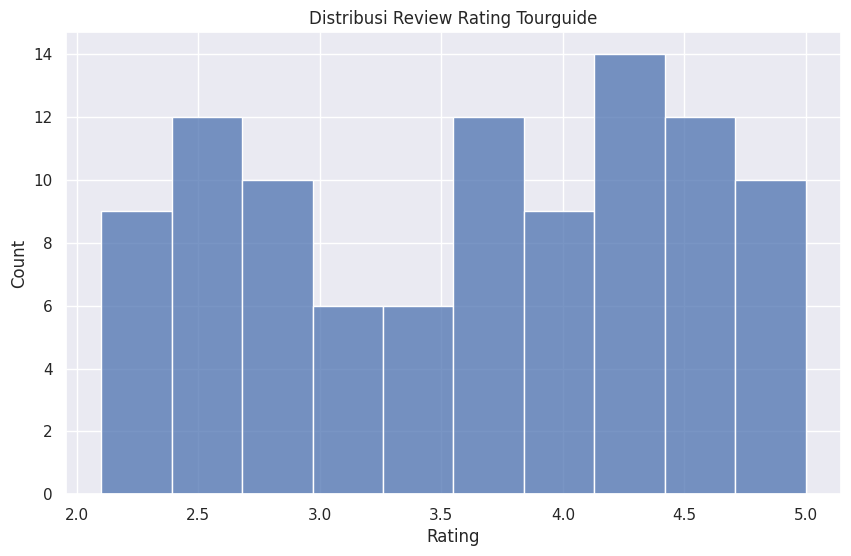

In [14]:
# Visualisasi data score untuk Tourguide
plt.figure(figsize=(10, 6))
sns.histplot(data=tourguide, x='Rating', bins=10)
plt.title('Distribusi Review Rating Tourguide')
plt.show()

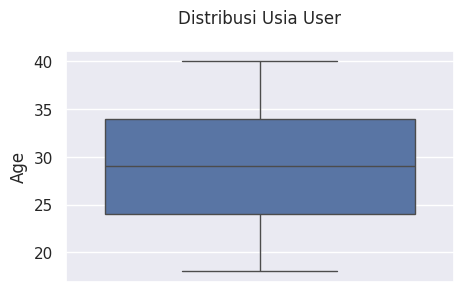

In [15]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

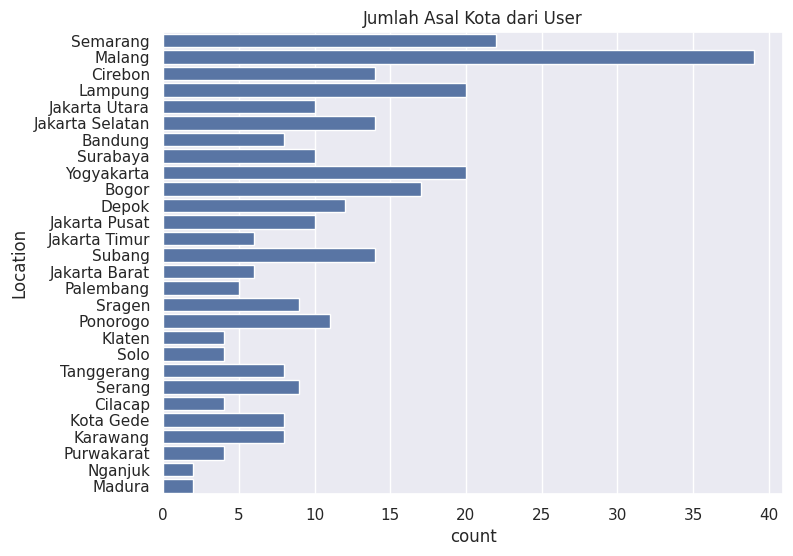

In [16]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

## Data Preparation for Modeling

### Create a Copy of Rating Data

In [17]:
# Membaca dataset untuk dilakukan encoding

df = rating.copy()
df.head()

,User_Id,tour_id,tour_rating
0,175,401,4.3
1,67,401,4.3
2,65,401,4.3
3,222,402,2.8
4,119,402,2.8


### Performing Encoding

#### Creating a Function to Perform Encoding

In [18]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

#### Encoding and Mapping User Columns

In [19]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

#### Encoding and Mapping Hotel Columns

In [20]:
# Encoding tour_Id
tour_to_tour_encoded, tour_encoded_to_tour = dict_encoder('tour_id')

# Mapping tour_id ke dataframe tour
df['tourguide'] = df['tour_id'].map(tour_to_tour_encoded)

### Viewing Data Overview for Modeling

In [21]:
# Mendapatkan jumlah user dan tourguide
num_user, num_tour = len(user_to_user_encoded), len(tour_to_tour_encoded)

# Mengubah rating menjadi nilai float
df['tour_rating'] = df['tour_rating'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['tour_rating']), max(df['tour_rating'])

print(f'Number of User: {num_user}, Number of Tourguide: {num_tour}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Tourguide: 100, Min Rating: 2.0999999046325684, Max Rating: 5.0


In [22]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head()

,User_Id,tour_id,tour_rating,user,tourguide
203,99,468,2.3,203,67
266,109,489,4.6,266,88
152,177,451,4.2,152,50
9,242,404,5.0,9,3
233,255,478,2.8,233,77


## Machine Learning Modeling with RecommenderNet

### Splitting train and test data

In [23]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'tourguide']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['tour_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.89 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

### Setup the Model

#### Function Initialization

In [24]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_user, num_tour, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_tour = num_tour
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-3)
    )
    self.user_bias = layers.Embedding(num_user, 1) # layer embedding user bias
    self.tour_embedding = layers.Embedding( # layer embeddings places
        num_tour,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.tour_bias = layers.Embedding(num_tour, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    tour_vector = self.tour_embedding(inputs[:, 1]) # memanggil layer embedding 3
    tour_bias = self.tour_bias(inputs[:, 1]) # memanggil layer embedding 4


    dot_user_tour = tf.tensordot(user_vector, tour_vector, 2)

    x = dot_user_tour + user_bias + tour_bias

    return tf.nn.sigmoid(x) # activation sigmoid

#### Model Initialization

In [25]:
model = RecommenderNet(num_user, num_tour, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.00006),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

#### Callbacks Initialization

In [26]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.20):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

#### Training Process

In [27]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 500,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/500
9/9 [==============================] - 1s 42ms/step - loss: 0.8248 - root_mean_squared_error: 0.3290 - val_loss: 0.8247 - val_root_mean_squared_error: 0.3277
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.8014 - root_mean_squared_error: 0.3123 - val_loss: 0.8242 - val_root_mean_squared_error: 0.3274
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 0.8466 - root_mean_squared_error: 0.3435 - val_loss: 0.8235 - val_root_mean_squared_error: 0.3272
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.8249 - root_mean_squared_error: 0.3282 - val_loss: 0.8229 - val_root_mean_squared_error: 0.3269
Epoch 5/500
9/9 [==============================] - 0s 10ms/step - loss: 0.8058 - root_mean_squared_error: 0.3159 - val_loss: 0.8224 - val_root_mean_squared_error: 0.3266
Epoch 6/500
9/9 [==============================] - 0s 9ms/step - loss: 0.8235 - root_mean_squared_error: 0.3287 - val_loss: 0.8219 - val_root_mean_square

In [28]:
# Simpan model TensorFlow
model_path = "recommender_model"
model.save(model_path)

In [29]:
# Mengonversi model TensorFlow ke TFLite
import tensorflow as tf

# Konversi model
converter = tf.lite.TFLiteConverter.from_saved_model(model_path)
tflite_model = converter.convert()

In [30]:
# Simpan model TFLite
tflite_model_path = "recommender_model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

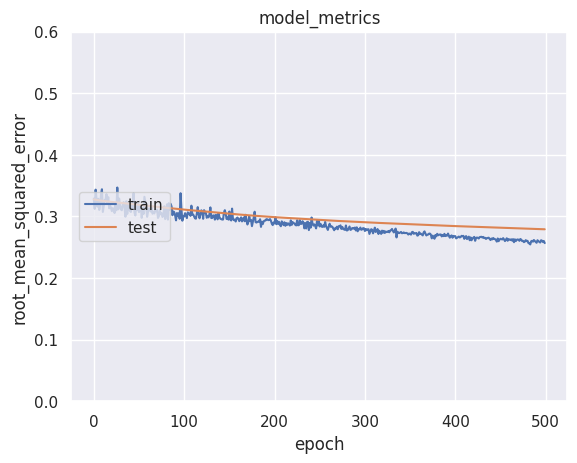

In [31]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.6)
plt.legend(['train', 'test'], loc='center left')
plt.show()

## Predicting Top 5 Recommendations

#### Preparing a DataFrame to Display Recommendation Results

In [32]:
# Menyiapkan dataframe
tour_df = tourguide[['tour_id','Nama Lengkap', 'Jenis Kelamin', 'Rating', 'Kategori Berdasarkan Diatas', 'Nomor HP']]
tour_df.columns = ['id','tour_name', 'tour_gender', 'tour_rating','category', 'phone_number']
df = rating.copy()

#### Setting up a User Sample to Display Recommendations

#### Searching for Users

In [33]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_data_visited_by_user_data = df[df.User_Id == user_id]

#### Searching for Locations that Users Have Not Visited

In [34]:
# Create tour_visited_by_user DataFrame for the specified user
tour_booking_by_user = rating[rating['User_Id'] == user_id]

# Ensure tour_to_tour_encoded and tour_encoded_to_tour are defined
tour_to_tour_encoded = {tourguide: idx for idx, tourguide in enumerate(tour_df['id'].unique())}
tour_encoded_to_tour = {idx: tourguide for tourguide, idx in tour_to_tour_encoded.items()}

# Create user_hotel_array based on the hotel's encoded values
user_tour_array = [[tour_to_tour_encoded[tourguide]] for tourguide in tour_df['id'].values]

In [35]:
# Membuat data lokasi yang belum di booking tourguide
tour_not_booking = tour_df[~tour_df['id'].isin(tour_booking_by_user['tour_id'].values)]['id']
tour_not_booking = list(set(tour_not_booking).intersection(set(tour_to_tour_encoded.keys())))

tour_not_booking = [[tour_to_tour_encoded.get(x)] for x in tour_not_booking]
user_encoder = user_to_user_encoded.get(user_id)
user_tour_array = np.hstack(
    ([[user_encoder]] * len(tour_not_booking), tour_not_booking)
)

In [36]:
user_tour_array

array([[95,  0],
       [95,  1],
       [95,  2],
       [95,  3],
       [95,  4],
       [95,  5],
       [95,  6],
       [95,  7],
       [95,  8],
       [95,  9],
       [95, 10],
       [95, 11],
       [95, 12],
       [95, 13],
       [95, 14],
       [95, 15],
       [95, 16],
       [95, 17],
       [95, 18],
       [95, 19],
       [95, 20],
       [95, 21],
       [95, 22],
       [95, 23],
       [95, 24],
       [95, 25],
       [95, 26],
       [95, 27],
       [95, 28],
       [95, 29],
       [95, 30],
       [95, 32],
       [95, 33],
       [95, 34],
       [95, 35],
       [95, 36],
       [95, 37],
       [95, 38],
       [95, 39],
       [95, 40],
       [95, 41],
       [95, 42],
       [95, 43],
       [95, 44],
       [95, 45],
       [95, 46],
       [95, 47],
       [95, 48],
       [95, 49],
       [95, 50],
       [95, 51],
       [95, 52],
       [95, 53],
       [95, 54],
       [95, 55],
       [95, 56],
       [95, 57],
       [95, 58],
       [95, 59

### Displaying Recommendation Results for Users

In [37]:
# Mengambil top 5 recommendation
ratings = model.predict(user_tour_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_tour_ids = [
    tour_encoded_to_tour.get(tour_not_booking[x][0]) for x in top_ratings_indices
]


print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tourguide yang sudah pernah di Booking dari user: {}'.format('User ' + str(user_id)))
print('----' * 15)

top_tur_user = (
    tour_booking_by_user.sort_values(
        by = 'tour_rating',
        ascending=False
    )
    .head(7)
    .tour_id.values
)

tour_df_rows = tour_df[tour_df['id'].isin(top_tur_user)]
for row in tour_df_rows.itertuples():
    print(f"Nama Tourguide: {row.tour_name} ({row.tour_gender})")  # Ganti dengan nama kolom yang sesuai
    print(f"Kategori Berdasarkan User: {row.category}")  # Ganti dengan nama kolom yang sesuai
    print(f"Nomor WhatsApp: {row.phone_number}")  # Ganti dengan nama kolom yang sesuai

print('')
print('----' * 15)
print('Top 7 Rekomendasi Tourguide untuk kamu')
print('----' * 15)

recommended_tour = tour_df[tour_df['id'].isin(recommended_tour_ids)]
for row, i in zip(recommended_tour.itertuples(), range(1, 8)):
    print(f"{i}. {row.tour_name}")
    print(f"    Kategori: {row.category}, Rating Tourguide: {row.tour_rating}")  # Assuming 'category' and 'tour_rating' are your column names
    print(f"    Nama Tourguide: {row.tour_name} ({row.tour_gender})")
    print(f"    Nomor WhatsApp: {row.phone_number}\n")

print('===' * 15)

4/4 [==============================] - 0s 4ms/step
Daftar rekomendasi untuk: User 290

------------------------------------------------------------
Tourguide yang sudah pernah di Booking dari user: User 290
------------------------------------------------------------
Nama Tourguide: Dian Fitriani (Perempuan)
Kategori Berdasarkan User: Wisata Budaya
Nomor WhatsApp: 87654321234

------------------------------------------------------------
Top 7 Rekomendasi Tourguide untuk kamu
------------------------------------------------------------
1. Joko Santoso
    Kategori: Alam, Glamping, Rating Tourguide: 4.6
    Nama Tourguide: Joko Santoso (Laki-laki)
    Nomor WhatsApp: 82345678901

2. Ratna Susilawati
    Kategori: Taman Nasional, Rating Tourguide: 4.7
    Nama Tourguide: Ratna Susilawati (Perempuan)
    Nomor WhatsApp: 85670123456

3. Yuniarti Putri
    Kategori: Pantai, Alam, Rating Tourguide: 4.4
    Nama Tourguide: Yuniarti Putri (Perempuan)
    Nomor WhatsApp: 89876543210

4. Nia Angg

In [38]:
import numpy as np
import tensorflow as tf

# Load the TFLite model
tflite_model_path = "recommender_model.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [39]:
# Get the input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [40]:
# Get the expected input tensor shape
input_shape = input_details[0]['shape']
print(f"Expected input tensor shape: {input_shape}")

Expected input tensor shape: [1 2]


In [41]:
# Prepare input data (user_hotel_array from previous code)
input_data = np.array(user_tour_array, dtype=np.int64)

In [42]:
# Reshape the input data for each user-hotel pair
output_data = []
for user_id, hotel_id in input_data:
    reshaped_input = np.array([user_id, hotel_id], dtype=np.int64).reshape(1, 2)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], reshaped_input)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output = interpreter.get_tensor(output_details[0]['index'])
    output_data.append(output[0][0])  # Assuming the output is a scalar

print(output_data)

[0.53183043, 0.47535482, 0.5176576, 0.5431382, 0.49404556, 0.5100207, 0.49235722, 0.45766252, 0.55210954, 0.50382, 0.5439784, 0.47726455, 0.49020493, 0.5428303, 0.53352356, 0.55310607, 0.4867558, 0.49685392, 0.54911286, 0.49222422, 0.523451, 0.48690343, 0.4826384, 0.54155624, 0.51379067, 0.52996415, 0.546316, 0.48155138, 0.5598809, 0.4770083, 0.53862715, 0.43796045, 0.52970994, 0.4863553, 0.5443654, 0.4749297, 0.46795008, 0.52233565, 0.46829596, 0.5545505, 0.53575206, 0.5162794, 0.55596966, 0.49386886, 0.55161357, 0.5063917, 0.49777722, 0.531953, 0.50083786, 0.5293956, 0.5081921, 0.49470994, 0.5310673, 0.5518607, 0.53199255, 0.5470595, 0.46522325, 0.51895845, 0.48468375, 0.5432849, 0.49965194, 0.45553723, 0.5305022, 0.4723989, 0.5202664, 0.5141266, 0.46759802, 0.53961724, 0.4633229, 0.5386292, 0.5163787, 0.4862546, 0.5375671, 0.46963266, 0.5523788, 0.49919593, 0.4956733, 0.53652793, 0.47436804, 0.52494305, 0.53672737, 0.4900675, 0.5728229, 0.4776899, 0.5323878, 0.52406484, 0.47591215, 